In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv('train_LZdllcl.csv')
df_test = pd.read_csv('test_2umaH9m.csv')

In [89]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [90]:
cols = ['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met', 'awards_won',
       'avg_training_score', 'is_promoted']
df.columns = cols

In [91]:
df.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met              54808 non-null  int64  
 11  awards_won            54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [93]:
df['education'].value_counts(dropna=False)

,count
education,
Bachelor's,36669
Master's & above,14925
NaN,2409
Below Secondary,805


In [95]:
df['previous_year_rating'].value_counts(dropna=False)

,count
previous_year_rating,
3.0,18618
5.0,11741
4.0,9877
1.0,6223
2.0,4225
NaN,4124


In [96]:
df['length_of_service'].min()

1

In [59]:
one_year_service= df[df.length_of_service == 1]
print('Employee with 1 year of service with null rating: ',one_year_service.previous_year_rating.isna().sum())

Employee with 1 year of service with null rating:  4124


In [97]:
print('Employee with 1 year of service with null rating and promoted: ',
    one_year_service[one_year_service.is_promoted == 1].previous_year_rating.isna().sum()
)

Employee with 1 year of service with null rating and promoted:  339


In [98]:
df['previous_year_rating'] = df['previous_year_rating'].fillna(0)

In [99]:
df[df['education'].isna()].is_promoted.value_counts()

,count
is_promoted,
0,2287
1,122


In [100]:
dept = df['department'].unique()
for d in dept:
    edu = df[df['department'] == d].education.mode()[0]
    print(f'{d}: {edu}')

Sales & Marketing: Bachelor's
Operations: Bachelor's
Technology: Bachelor's
Analytics: Bachelor's
R&D: Bachelor's
Procurement: Bachelor's
Finance: Bachelor's
HR: Bachelor's
Legal: Bachelor's


In [104]:
df['education'] = df['education'].fillna(df['education'].mode()[0])

In [103]:
df.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


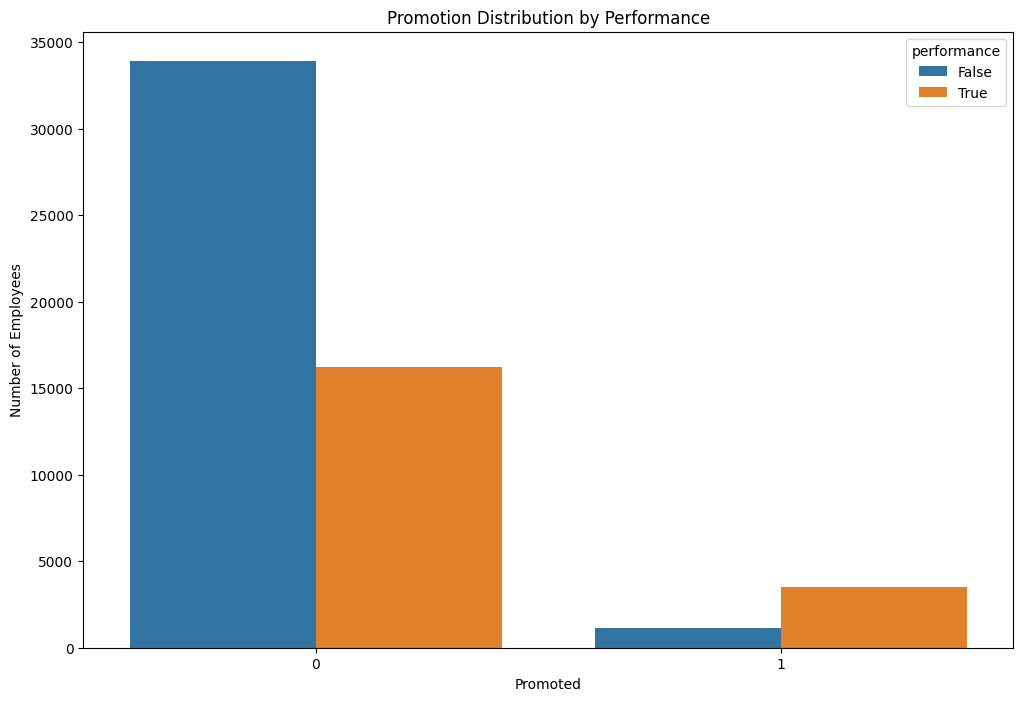

In [105]:
df['performance'] = df[['KPIs_met','awards_won']].any(axis=1,skipna=False)
plt.figure(figsize=(12, 8))
sns.countplot(x='is_promoted', hue='performance', data=df)
plt.xlabel('Promoted')
plt.ylabel('Number of Employees')
plt.title('Promotion Distribution by Performance')
plt.show()


In [106]:
df['total_score'] = df['no_of_trainings'] * df['avg_training_score']
df['total_score_label'] = pd.cut(df['total_score'],bins=[0,65,145,1000],labels=['Low','Mediocre','High'])
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted,performance,total_score,total_score_label
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,True,49,Low
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,False,60,Low
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,False,50,Low
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,False,100,Mediocre
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,False,73,Mediocre


In [107]:
scores = df.pivot_table(values='is_promoted',index='total_score_label')
scores

<ipython-input-107-a62854f45356>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  scores = df.pivot_table(values='is_promoted',index='total_score_label')


,is_promoted
total_score_label,
Low,0.057549
Mediocre,0.117858
High,0.097444


Text(0.5, 0, 'Score level')

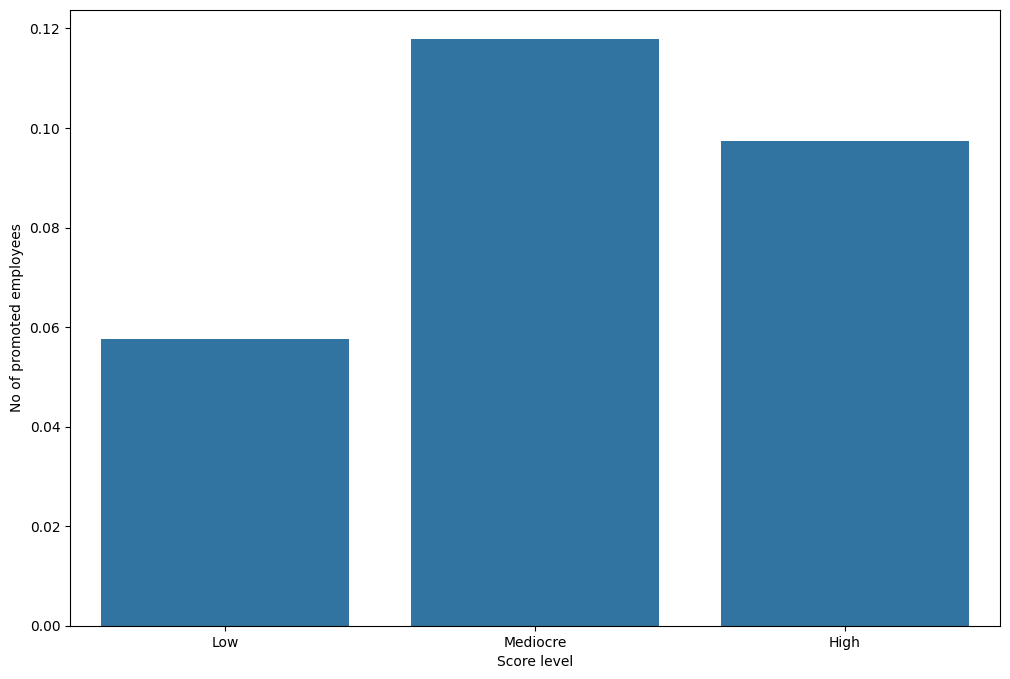

In [108]:
plt.figure(figsize=(12,8))
sns.barplot(x=scores.index,y=scores.is_promoted)
plt.ylabel('No of promoted employees')
plt.xlabel('Score level')

In [109]:
drop_col =['employee_id','department','region','education','gender','recruitment_channel','KPIs_met','awards_won','total_score_label']
df.drop(drop_col, axis=1, inplace= True)
df.head()

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted,performance,total_score
0,1,35,5.0,8,49,0,True,49
1,1,30,5.0,4,60,0,False,60
2,1,34,3.0,7,50,0,False,50
3,2,39,1.0,10,50,0,False,100
4,1,45,3.0,2,73,0,False,73


In [110]:
df['performance'] = df['performance'].astype(int)

In [111]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score', 'total_score']

scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted,performance,total_score
0,0.000000,0.375,1.0,0.194444,0.166667,0,1,0.014903
1,0.000000,0.250,1.0,0.083333,0.350000,0,0,0.031297
2,0.000000,0.350,0.6,0.166667,0.183333,0,0,0.016393
3,0.111111,0.475,0.2,0.250000,0.183333,0,0,0.090909
4,0.000000,0.625,0.6,0.027778,0.566667,0,0,0.050671


In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [113]:
x = df.drop(['is_promoted'], axis=1)
y = df['is_promoted']

In [114]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [115]:
rf = RandomForestClassifier()
rf = rf.fit(x_train,y_train)
y_pred_rf= rf.predict(x_test)

In [116]:
print('Accuracy :',accuracy_score(y_test,y_pred_rf))
print('\nConfusion Matrix \n', confusion_matrix(y_test,y_pred_rf))
print('\nClassification Report :\n',classification_report(y_test,y_pred_rf))

Accuracy : 0.9045394832871114

Confusion Matrix 
 [[12187   384]
 [  924   207]]

Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     12571
           1       0.35      0.18      0.24      1131

    accuracy                           0.90     13702
   macro avg       0.64      0.58      0.59     13702
weighted avg       0.88      0.90      0.89     13702



Train Dataset

In [141]:
df_test= pd.read_csv('test_2umaH9m.csv')
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [142]:
employee_ids = df_test['employee_id']

In [143]:
df_test.isna().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [144]:
df_test['previous_year_rating'].value_counts(dropna=False)

,count
previous_year_rating,
3.0,7921
5.0,5097
4.0,4249
1.0,2680
NaN,1812
2.0,1731


In [145]:
df_test['previous_year_rating'] = df_test['previous_year_rating'].fillna(0)

In [146]:
df_test['performance'] = df_test[['KPIs_met >80%','awards_won?']].any(axis=1,skipna=False)

In [147]:
df_test['total_score'] = df_test['no_of_trainings'] * df_test['avg_training_score']
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,performance,total_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,0.0,1,1,0,77,True,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,False,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,False,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,False,195
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,False,61


In [148]:
df_test['performance'] = df_test['performance'].astype(int)

In [149]:
drop_col =['employee_id','department','region','education','gender','recruitment_channel','KPIs_met >80%','awards_won?']
df_test.drop(drop_col, axis=1, inplace= True)
df_test.head()

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,performance,total_score
0,1,24,0.0,1,77,1,77
1,1,31,3.0,5,51,0,51
2,1,31,1.0,4,47,0,47
3,3,31,2.0,9,65,0,195
4,1,30,4.0,7,61,0,61


In [150]:
numerical_features = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score', 'total_score']
scaler_test = MinMaxScaler()
df_test[numerical_features] = scaler_test.fit_transform(df_test[numerical_features])
df_test.head()

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,performance,total_score
0,0.00,0.100,0.0,0.000000,0.633333,1,0.061489
1,0.00,0.275,0.6,0.121212,0.200000,0,0.019417
2,0.00,0.275,0.2,0.090909,0.133333,0,0.012945
3,0.25,0.275,0.4,0.242424,0.433333,0,0.252427
4,0.00,0.250,0.8,0.181818,0.366667,0,0.035599


In [153]:
x.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'avg_training_score', 'performance', 'total_score'],
      dtype='object')

In [154]:
x_new = df_test[['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score','performance', 'total_score']]
y_new_pred = rf.predict(x_new)

In [155]:
df_test['is_promoted'] = y_new_pred
df_test['employee_id'] = employee_ids
df_test.head()

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,performance,total_score,is_promoted,employee_id
0,0.00,0.100,0.0,0.000000,0.633333,1,0.061489,0,8724
1,0.00,0.275,0.6,0.121212,0.200000,0,0.019417,0,74430
2,0.00,0.275,0.2,0.090909,0.133333,0,0.012945,0,72255
3,0.25,0.275,0.4,0.242424,0.433333,0,0.252427,0,38562
4,0.00,0.250,0.8,0.181818,0.366667,0,0.035599,0,64486


In [158]:
selected = df_test[['employee_id', 'is_promoted']]
selected.to_csv('/content/promo_predictions.csv', index=False)